In [ ]:

!pip install tabulate

# Standard libraries
import sys  # System-specific parameters and functions
import os   # Miscellaneous operating system interfaces
import warnings  # Warning control
warnings.filterwarnings("ignore")

# Data manipulation
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical operations

# Visualization
import matplotlib.pyplot as plt  # Plotting library
import seaborn as sns  # Statistical data visualization
from matplotlib.colors import ListedColormap  # Colormap utilities

# Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler  # Preprocessing tools
from sklearn import model_selection, metrics, preprocessing  # Model selection, evaluation, and preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV  # Model selection and evaluation
from sklearn.tree import DecisionTreeClassifier  # Decision tree classifier


# Statistical analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor  # Variance inflation factor
from scipy.stats import pointbiserialr, chi2_contingency, spearmanr, entropy  # Statistical functions
from statsmodels.graphics.gofplots import qqplot  # Q-Q plot
from collections import Counter  # Container datatypes

# Tabulate
from tabulate import tabulate  # Pretty-print tabular data

# Set visualization style
#sns.set()  # Set Seaborn default style
#plt.style.use('ggplot')  # Set ggplot style for matplotlib



# LOADING THE DATA SET
#https://drive.google.com/file/d/1Z_KsoIumw-fvivVombIoWuRo0LOe2nCb/view?usp=sharing
#https://drive.google.com/file/d/1aD1PXfwEEZ_F2lQgxuPfj-TVbxQ6NajK/view?usp=sharing
import gdown
import pandas as pd


# Read Xlsx file
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
import pandas as pd
import numpy as np  # Ensure numpy is imported
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Read Xlsx file
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
import pandas as pd
import numpy as np  # Ensure numpy is imported
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


import pandas as pd

# Updated Google Sheets link setup
sheet_id = "1j_Euo80PrGckVDVr2hTG9zZebxJD0TSC"
sheet_name = "Sheet1"  # Update this if the sheet name is different

# Generate the CSV export link
csv_url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

# Read the Google Sheet as CSV
df = pd.read_csv(csv_url)

# Backup original DataFrame
df_backup = df.copy()


# Set Date as the index
df = df.set_index('Date')

# Display the DataFrame (optional in scripts)
df.head()
df_backup=df.copy()

df = df.drop(columns=["YEAR", "MO", "DY"])

df

df.columns
df.columns
# List of monsoon season columns
monsoon_cols = [
    'MONOSOON_SEASON_Northeast_Monsoon',
    'MONOSOON_SEASON_Second_Inter_Monsoon',
    'MONOSOON_SEASON_Southwest_Monsoon'
]

# Convert True/False to 1/0
df[monsoon_cols] = df[monsoon_cols].astype(int)

df

import pandas as pd
import numpy as np
#from statsmodels.tsa.statespace.tools import cdiff

# 1. Make first differences to ensure stationarity
df['SURF_PRESSURE_DIFF'] = df['SURF_PRESSSURE'].diff().dropna()

# 2. Remove the original non-stationary series
df = df.drop(columns=['SURF_PRESSSURE'])


# 4. Final check - drop any NaN values created by differencing
df = df.dropna()

# Verify the result
print(f"Original columns: {df.columns.tolist()}")
print(f"NaN values after processing: {df.isnull().sum().sum()}")


df_backup=df.copy()
df

df_backup

# First verify these columns exist in your DataFrame
existing_monsoon_cols = [col for col in monsoon_cols if col in df.columns]

if existing_monsoon_cols:
    print(f"Dropping monsoon columns: {existing_monsoon_cols}")

    # Option 1: Simply drop the columns (recommended if they're purely categorical)
    df = df.drop(columns=existing_monsoon_cols)

import pandas as pd
import numpy as np


y=df["WS10M"]
X=df.drop(["WS10M"],axis=1)

df

X.columns


import numpy as np
import pandas as pd
import plotly.graph_objects as go
from statsmodels.tsa.stattools import ccf

def interactive_cross_correlation(df, x_col, target_col, max_lag=365, alpha=0.05):
    x = df[x_col].dropna()
    y = df[target_col].dropna()

    # Ensure equal length
    min_len = min(len(x), len(y))
    x, y = x[:min_len], y[:min_len]

    # Compute cross-correlation
    ccf_values = ccf(x, y)[:max_lag]

    # Compute significance level (approximation)
    n = len(x)
    critical_value = 1.96 / np.sqrt(n)  # 95% confidence interval

    # Extract significant values
    significant_lags = np.where(np.abs(ccf_values) > critical_value)[0]
    significant_values = ccf_values[significant_lags]

    # Create interactive plot
    fig = go.Figure()

    # Add cross-correlation values
    fig.add_trace(go.Scatter(
        x=np.arange(max_lag),
        y=ccf_values,
        mode='lines+markers',
        name="Cross-Correlation",
        marker=dict(color='blue')
    ))

    # Add significance threshold
    fig.add_trace(go.Scatter(
        x=np.arange(max_lag),
        y=[critical_value] * max_lag,
        mode='lines',
        name="95% CI Upper",
        line=dict(color='red', dash='dash')
    ))

    fig.add_trace(go.Scatter(
        x=np.arange(max_lag),
        y=[-critical_value] * max_lag,
        mode='lines',
        name="95% CI Lower",
        line=dict(color='red', dash='dash')
    ))

    # Highlight significant points
    fig.add_trace(go.Scatter(
        x=significant_lags,
        y=significant_values,
        mode='markers',
        name="Significant Lags",
        marker=dict(color='green', size=8, symbol='star')
    ))

    # Layout adjustments
    fig.update_layout(
        title=f"Interactive Cross-Correlation between {x_col} and {target_col}",
        xaxis_title="Lag (days)",
        yaxis_title="Cross-Correlation",
        template="plotly_white"
    )

    fig.show()

    # Return significant lags and values
    return pd.DataFrame({"Lag": significant_lags, "Cross-Correlation": significant_values})

# Example usage
significant_results = interactive_cross_correlation(df, x_col='WD_cos', target_col='WS10M')
print(significant_results)

import numpy as np
import pandas as pd
import plotly.graph_objects as go
from statsmodels.tsa.stattools import ccf

def interactive_cross_correlation(df, x_col, target_col, max_lag=365, alpha=0.05):
    x = df[x_col].dropna()
    y = df[target_col].dropna()

    # Ensure equal length
    min_len = min(len(x), len(y))
    x, y = x[:min_len], y[:min_len]

    # Compute cross-correlation
    ccf_values = ccf(x, y)[:max_lag]

    # Compute significance level (approximation)
    n = len(x)
    critical_value = 1.96 / np.sqrt(n)  # 95% confidence interval

    # Extract significant values
    significant_lags = np.where(np.abs(ccf_values) > critical_value)[0]
    significant_values = ccf_values[significant_lags]

    # Create interactive plot
    fig = go.Figure()

    # Add cross-correlation values
    fig.add_trace(go.Scatter(
        x=np.arange(max_lag),
        y=ccf_values,
        mode='lines+markers',
        name="Cross-Correlation",
        marker=dict(color='blue')
    ))

    # Add significance threshold
    fig.add_trace(go.Scatter(
        x=np.arange(max_lag),
        y=[critical_value] * max_lag,
        mode='lines',
        name="95% CI Upper",
        line=dict(color='red', dash='dash')
    ))

    fig.add_trace(go.Scatter(
        x=np.arange(max_lag),
        y=[-critical_value] * max_lag,
        mode='lines',
        name="95% CI Lower",
        line=dict(color='red', dash='dash')
    ))

    # Highlight significant points
    fig.add_trace(go.Scatter(
        x=significant_lags,
        y=significant_values,
        mode='markers',
        name="Significant Lags",
        marker=dict(color='green', size=8, symbol='star')
    ))

    # Layout adjustments
    fig.update_layout(
        title=f"Interactive Cross-Correlation between {x_col} and {target_col}",
        xaxis_title="Lag (days)",
        yaxis_title="Cross-Correlation",
        template="plotly_white"
    )

    fig.show()

    # Return significant lags and values
    return pd.DataFrame({"Lag": significant_lags, "Cross-Correlation": significant_values})

# Example usage
significant_results = interactive_cross_correlation(df, x_col='SURF_PRESSURE_DIFF', target_col='WS10M')
print(significant_results)

import numpy as np
import pandas as pd
import plotly.graph_objects as go
from statsmodels.tsa.stattools import ccf

def interactive_cross_correlation(df, x_col, target_col, max_lag=365, alpha=0.05):
    x = df[x_col].dropna()
    y = df[target_col].dropna()

    # Ensure equal length
    min_len = min(len(x), len(y))
    x, y = x[:min_len], y[:min_len]

    # Compute cross-correlation
    ccf_values = ccf(x, y)[:max_lag]

    # Compute significance level (approximation)
    n = len(x)
    critical_value = 1.96 / np.sqrt(n)  # 95% confidence interval

    # Extract significant values
    significant_lags = np.where(np.abs(ccf_values) > critical_value)[0]
    significant_values = ccf_values[significant_lags]

    # Create interactive plot
    fig = go.Figure()

    # Add cross-correlation values
    fig.add_trace(go.Scatter(
        x=np.arange(max_lag),
        y=ccf_values,
        mode='lines+markers',
        name="Cross-Correlation",
        marker=dict(color='blue')
    ))

    # Add significance threshold
    fig.add_trace(go.Scatter(
        x=np.arange(max_lag),
        y=[critical_value] * max_lag,
        mode='lines',
        name="95% CI Upper",
        line=dict(color='red', dash='dash')
    ))

    fig.add_trace(go.Scatter(
        x=np.arange(max_lag),
        y=[-critical_value] * max_lag,
        mode='lines',
        name="95% CI Lower",
        line=dict(color='red', dash='dash')
    ))

    # Highlight significant points
    fig.add_trace(go.Scatter(
        x=significant_lags,
        y=significant_values,
        mode='markers',
        name="Significant Lags",
        marker=dict(color='green', size=8, symbol='star')
    ))

    # Layout adjustments
    fig.update_layout(
        title=f"Interactive Cross-Correlation between {x_col} and {target_col}",
        xaxis_title="Lag (days)",
        yaxis_title="Cross-Correlation",
        template="plotly_white"
    )

    fig.show()

    # Return significant lags and values
    return pd.DataFrame({"Lag": significant_lags, "Cross-Correlation": significant_values})

# Example usage
significant_results = interactive_cross_correlation(df, x_col='WD_sin', target_col='WS10M')
print(significant_results)

import numpy as np
import pandas as pd
import plotly.graph_objects as go
from statsmodels.tsa.stattools import ccf

def interactive_cross_correlation(df, x_col, target_col, max_lag=365, alpha=0.05):
    x = df[x_col].dropna()
    y = df[target_col].dropna()

    # Ensure equal length
    min_len = min(len(x), len(y))
    x, y = x[:min_len], y[:min_len]

    # Compute cross-correlation
    ccf_values = ccf(x, y)[:max_lag]

    # Compute significance level (approximation)
    n = len(x)
    critical_value = 1.96 / np.sqrt(n)  # 95% confidence interval

    # Extract significant values
    significant_lags = np.where(np.abs(ccf_values) > critical_value)[0]
    significant_values = ccf_values[significant_lags]

    # Create interactive plot
    fig = go.Figure()

    # Add cross-correlation values
    fig.add_trace(go.Scatter(
        x=np.arange(max_lag),
        y=ccf_values,
        mode='lines+markers',
        name="Cross-Correlation",
        marker=dict(color='blue')
    ))

    # Add significance threshold
    fig.add_trace(go.Scatter(
        x=np.arange(max_lag),
        y=[critical_value] * max_lag,
        mode='lines',
        name="95% CI Upper",
        line=dict(color='red', dash='dash')
    ))

    fig.add_trace(go.Scatter(
        x=np.arange(max_lag),
        y=[-critical_value] * max_lag,
        mode='lines',
        name="95% CI Lower",
        line=dict(color='red', dash='dash')
    ))

    # Highlight significant points
    fig.add_trace(go.Scatter(
        x=significant_lags,
        y=significant_values,
        mode='markers',
        name="Significant Lags",
        marker=dict(color='green', size=8, symbol='star')
    ))

    # Layout adjustments
    fig.update_layout(
        title=f"Interactive Cross-Correlation between {x_col} and {target_col}",
        xaxis_title="Lag (days)",
        yaxis_title="Cross-Correlation",
        template="plotly_white"
    )

    fig.show()

    # Return significant lags and values
    return pd.DataFrame({"Lag": significant_lags, "Cross-Correlation": significant_values})

# Example usage
significant_results = interactive_cross_correlation(df, x_col='CLOUD_COVER', target_col='WS10M')
print(significant_results)

import numpy as np
import pandas as pd
import plotly.graph_objects as go
from statsmodels.tsa.stattools import ccf

def interactive_cross_correlation(df, x_col, target_col, max_lag=365, alpha=0.05):
    x = df[x_col].dropna()
    y = df[target_col].dropna()

    # Ensure equal length
    min_len = min(len(x), len(y))
    x, y = x[:min_len], y[:min_len]

    # Compute cross-correlation
    ccf_values = ccf(x, y)[:max_lag]

    # Compute significance level (approximation)
    n = len(x)
    critical_value = 1.96 / np.sqrt(n)  # 95% confidence interval

    # Extract significant values
    significant_lags = np.where(np.abs(ccf_values) > critical_value)[0]
    significant_values = ccf_values[significant_lags]

    # Create interactive plot
    fig = go.Figure()

    # Add cross-correlation values
    fig.add_trace(go.Scatter(
        x=np.arange(max_lag),
        y=ccf_values,
        mode='lines+markers',
        name="Cross-Correlation",
        marker=dict(color='blue')
    ))

    # Add significance threshold
    fig.add_trace(go.Scatter(
        x=np.arange(max_lag),
        y=[critical_value] * max_lag,
        mode='lines',
        name="95% CI Upper",
        line=dict(color='red', dash='dash')
    ))

    fig.add_trace(go.Scatter(
        x=np.arange(max_lag),
        y=[-critical_value] * max_lag,
        mode='lines',
        name="95% CI Lower",
        line=dict(color='red', dash='dash')
    ))

    # Highlight significant points
    fig.add_trace(go.Scatter(
        x=significant_lags,
        y=significant_values,
        mode='markers',
        name="Significant Lags",
        marker=dict(color='green', size=8, symbol='star')
    ))

    # Layout adjustments
    fig.update_layout(
        title=f"Interactive Cross-Correlation between {x_col} and {target_col}",
        xaxis_title="Lag (days)",
        yaxis_title="Cross-Correlation",
        template="plotly_white"
    )

    fig.show()

    # Return significant lags and values
    return pd.DataFrame({"Lag": significant_lags, "Cross-Correlation": significant_values})

# Example usage
significant_results = interactive_cross_correlation(df, x_col='RH', target_col='WS10M')
print(significant_results)

import numpy as np
import pandas as pd
import plotly.graph_objects as go
from statsmodels.tsa.stattools import ccf

def interactive_cross_correlation(df, x_col, target_col, max_lag=365, alpha=0.05):
    x = df[x_col].dropna()
    y = df[target_col].dropna()

    # Ensure equal length
    min_len = min(len(x), len(y))
    x, y = x[:min_len], y[:min_len]

    # Compute cross-correlation
    ccf_values = ccf(x, y)[:max_lag]

    # Compute significance level (approximation)
    n = len(x)
    critical_value = 1.96 / np.sqrt(n)  # 95% confidence interval

    # Extract significant values
    significant_lags = np.where(np.abs(ccf_values) > critical_value)[0]
    significant_values = ccf_values[significant_lags]

    # Create interactive plot
    fig = go.Figure()

    # Add cross-correlation values
    fig.add_trace(go.Scatter(
        x=np.arange(max_lag),
        y=ccf_values,
        mode='lines+markers',
        name="Cross-Correlation",
        marker=dict(color='blue')
    ))

    # Add significance threshold
    fig.add_trace(go.Scatter(
        x=np.arange(max_lag),
        y=[critical_value] * max_lag,
        mode='lines',
        name="95% CI Upper",
        line=dict(color='red', dash='dash')
    ))

    fig.add_trace(go.Scatter(
        x=np.arange(max_lag),
        y=[-critical_value] * max_lag,
        mode='lines',
        name="95% CI Lower",
        line=dict(color='red', dash='dash')
    ))

    # Highlight significant points
    fig.add_trace(go.Scatter(
        x=significant_lags,
        y=significant_values,
        mode='markers',
        name="Significant Lags",
        marker=dict(color='green', size=8, symbol='star')
    ))

    # Layout adjustments
    fig.update_layout(
        title=f"Interactive Cross-Correlation between {x_col} and {target_col}",
        xaxis_title="Lag (days)",
        yaxis_title="Cross-Correlation",
        template="plotly_white"
    )

    fig.show()

    # Return significant lags and values
    return pd.DataFrame({"Lag": significant_lags, "Cross-Correlation": significant_values})

# Example usage
significant_results = interactive_cross_correlation(df, x_col='SL_PRESSURE', target_col='WS10M')
print(significant_results)

# 4 PREC 12,26
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from statsmodels.tsa.stattools import ccf

def interactive_cross_correlation(df, x_col, target_col, max_lag=365, alpha=0.05):
    x = df[x_col].dropna()
    y = df[target_col].dropna()

    # Ensure equal length
    min_len = min(len(x), len(y))
    x, y = x[:min_len], y[:min_len]

    # Compute cross-correlation
    ccf_values = ccf(x, y)[:max_lag]

    # Compute significance level (approximation)
    n = len(x)
    critical_value = 1.96 / np.sqrt(n)  # 95% confidence interval

    # Extract significant values
    significant_lags = np.where(np.abs(ccf_values) > critical_value)[0]
    significant_values = ccf_values[significant_lags]

    # Create interactive plot
    fig = go.Figure()

    # Add cross-correlation values
    fig.add_trace(go.Scatter(
        x=np.arange(max_lag),
        y=ccf_values,
        mode='lines+markers',
        name="Cross-Correlation",
        marker=dict(color='blue')
    ))

    # Add significance threshold
    fig.add_trace(go.Scatter(
        x=np.arange(max_lag),
        y=[critical_value] * max_lag,
        mode='lines',
        name="95% CI Upper",
        line=dict(color='red', dash='dash')
    ))

    fig.add_trace(go.Scatter(
        x=np.arange(max_lag),
        y=[-critical_value] * max_lag,
        mode='lines',
        name="95% CI Lower",
        line=dict(color='red', dash='dash')
    ))

    # Highlight significant points
    fig.add_trace(go.Scatter(
        x=significant_lags,
        y=significant_values,
        mode='markers',
        name="Significant Lags",
        marker=dict(color='green', size=8, symbol='star')
    ))

    # Layout adjustments
    fig.update_layout(
        title=f"Interactive Cross-Correlation between {x_col} and {target_col}",
        xaxis_title="Lag (days)",
        yaxis_title="Cross-Correlation",
        template="plotly_white"
    )

    fig.show()

    # Return significant lags and values
    return pd.DataFrame({"Lag": significant_lags, "Cross-Correlation": significant_values})

# Example usage
significant_results = interactive_cross_correlation(df, x_col='PREC', target_col='WS10M')
print(significant_results)

# 3   MIN_TEMP 3-219
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from statsmodels.tsa.stattools import ccf

def interactive_cross_correlation(df, x_col, target_col, max_lag=365, alpha=0.05):
    x = df[x_col].dropna()
    y = df[target_col].dropna()

    # Ensure equal length
    min_len = min(len(x), len(y))
    x, y = x[:min_len], y[:min_len]

    # Compute cross-correlation
    ccf_values = ccf(x, y)[:max_lag]

    # Compute significance level (approximation)
    n = len(x)
    critical_value = 1.96 / np.sqrt(n)  # 95% confidence interval

    # Extract significant values
    significant_lags = np.where(np.abs(ccf_values) > critical_value)[0]
    significant_values = ccf_values[significant_lags]

    # Create interactive plot
    fig = go.Figure()

    # Add cross-correlation values
    fig.add_trace(go.Scatter(
        x=np.arange(max_lag),
        y=ccf_values,
        mode='lines+markers',
        name="Cross-Correlation",
        marker=dict(color='blue')
    ))

    # Add significance threshold
    fig.add_trace(go.Scatter(
        x=np.arange(max_lag),
        y=[critical_value] * max_lag,
        mode='lines',
        name="95% CI Upper",
        line=dict(color='red', dash='dash')
    ))

    fig.add_trace(go.Scatter(
        x=np.arange(max_lag),
        y=[-critical_value] * max_lag,
        mode='lines',
        name="95% CI Lower",
        line=dict(color='red', dash='dash')
    ))

    # Highlight significant points
    fig.add_trace(go.Scatter(
        x=significant_lags,
        y=significant_values,
        mode='markers',
        name="Significant Lags",
        marker=dict(color='green', size=8, symbol='star')
    ))

    # Layout adjustments
    fig.update_layout(
        title=f"Interactive Cross-Correlation between {x_col} and {target_col}",
        xaxis_title="Lag (days)",
        yaxis_title="Cross-Correlation",
        template="plotly_white"
    )

    fig.show()

    # Return significant lags and values
    return pd.DataFrame({"Lag": significant_lags, "Cross-Correlation": significant_values})

# Example usage
significant_results = interactive_cross_correlation(df, x_col='MIN_TEMP', target_col='WS10M')
print(significant_results)


# 2 Max temp = 0 -139
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from statsmodels.tsa.stattools import ccf

def interactive_cross_correlation(df, x_col, target_col, max_lag=365, alpha=0.05):
    x = df[x_col].dropna()
    y = df[target_col].dropna()

    # Ensure equal length
    min_len = min(len(x), len(y))
    x, y = x[:min_len], y[:min_len]

    # Compute cross-correlation
    ccf_values = ccf(x, y)[:max_lag]

    # Compute significance level (approximation)
    n = len(x)
    critical_value = 1.96 / np.sqrt(n)  # 95% confidence interval

    # Extract significant values
    significant_lags = np.where(np.abs(ccf_values) > critical_value)[0]
    significant_values = ccf_values[significant_lags]

    # Create interactive plot
    fig = go.Figure()

    # Add cross-correlation values
    fig.add_trace(go.Scatter(
        x=np.arange(max_lag),
        y=ccf_values,
        mode='lines+markers',
        name="Cross-Correlation",
        marker=dict(color='blue')
    ))

    # Add significance threshold
    fig.add_trace(go.Scatter(
        x=np.arange(max_lag),
        y=[critical_value] * max_lag,
        mode='lines',
        name="95% CI Upper",
        line=dict(color='red', dash='dash')
    ))

    fig.add_trace(go.Scatter(
        x=np.arange(max_lag),
        y=[-critical_value] * max_lag,
        mode='lines',
        name="95% CI Lower",
        line=dict(color='red', dash='dash')
    ))

    # Highlight significant points
    fig.add_trace(go.Scatter(
        x=significant_lags,
        y=significant_values,
        mode='markers',
        name="Significant Lags",
        marker=dict(color='green', size=8, symbol='star')
    ))

    # Layout adjustments
    fig.update_layout(
        title=f"Interactive Cross-Correlation between {x_col} and {target_col}",
        xaxis_title="Lag (days)",
        yaxis_title="Cross-Correlation",
        template="plotly_white"
    )

    fig.show()

    # Return significant lags and values
    return pd.DataFrame({"Lag": significant_lags, "Cross-Correlation": significant_values})

# Example usage
significant_results = interactive_cross_correlation(df, x_col='MAX_TEMP', target_col='WS10M')
print(significant_results)


# 1 Avg Temp :0- 202
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from statsmodels.tsa.stattools import ccf

def interactive_cross_correlation(df, x_col, target_col, max_lag=365, alpha=0.05):
    x = df[x_col].dropna()
    y = df[target_col].dropna()

    # Ensure equal length
    min_len = min(len(x), len(y))
    x, y = x[:min_len], y[:min_len]

    # Compute cross-correlation
    ccf_values = ccf(x, y)[:max_lag]

    # Compute significance level (approximation)
    n = len(x)
    critical_value = 1.96 / np.sqrt(n)  # 95% confidence interval

    # Extract significant values
    significant_lags = np.where(np.abs(ccf_values) > critical_value)[0]
    significant_values = ccf_values[significant_lags]

    # Create interactive plot
    fig = go.Figure()

    # Add cross-correlation values
    fig.add_trace(go.Scatter(
        x=np.arange(max_lag),
        y=ccf_values,
        mode='lines+markers',
        name="Cross-Correlation",
        marker=dict(color='blue')
    ))

    # Add significance threshold
    fig.add_trace(go.Scatter(
        x=np.arange(max_lag),
        y=[critical_value] * max_lag,
        mode='lines',
        name="95% CI Upper",
        line=dict(color='red', dash='dash')
    ))

    fig.add_trace(go.Scatter(
        x=np.arange(max_lag),
        y=[-critical_value] * max_lag,
        mode='lines',
        name="95% CI Lower",
        line=dict(color='red', dash='dash')
    ))

    # Highlight significant points
    fig.add_trace(go.Scatter(
        x=significant_lags,
        y=significant_values,
        mode='markers',
        name="Significant Lags",
        marker=dict(color='green', size=8, symbol='star')
    ))

    # Layout adjustments
    fig.update_layout(
        title=f"Interactive Cross-Correlation between {x_col} and {target_col}",
        xaxis_title="Lag (days)",
        yaxis_title="Cross-Correlation",
        template="plotly_white"
    )

    fig.show()

    # Return significant lags and values
    return pd.DataFrame({"Lag": significant_lags, "Cross-Correlation": significant_values})

# Example usage
significant_results = interactive_cross_correlation(df, x_col='AVG_TEMP', target_col='WS10M')
print(significant_results)



import numpy as np
import pandas as pd
import plotly.graph_objects as go
from statsmodels.tsa.stattools import ccf

def interactive_cross_correlation(df, x_col, target_col, max_lag=365, alpha=0.05):
    x = df[x_col].dropna()
    y = df[target_col].dropna()

    # Ensure equal length
    min_len = min(len(x), len(y))
    x, y = x[:min_len], y[:min_len]

    # Compute cross-correlation
    ccf_values = ccf(x, y)[:max_lag]

    # Compute significance level (approximation)
    n = len(x)
    critical_value = 1.96 / np.sqrt(n)  # 95% confidence interval

    # Extract significant values
    significant_lags = np.where(np.abs(ccf_values) > critical_value)[0]
    significant_values = ccf_values[significant_lags]

    # Create interactive plot
    fig = go.Figure()

    # Add cross-correlation values
    fig.add_trace(go.Scatter(
        x=np.arange(max_lag),
        y=ccf_values,
        mode='lines+markers',
        name="Cross-Correlation",
        marker=dict(color='blue')
    ))

    # Add significance threshold
    fig.add_trace(go.Scatter(
        x=np.arange(max_lag),
        y=[critical_value] * max_lag,
        mode='lines',
        name="95% CI Upper",
        line=dict(color='red', dash='dash')
    ))

    fig.add_trace(go.Scatter(
        x=np.arange(max_lag),
        y=[-critical_value] * max_lag,
        mode='lines',
        name="95% CI Lower",
        line=dict(color='red', dash='dash')
    ))

    # Highlight significant points
    fig.add_trace(go.Scatter(
        x=significant_lags,
        y=significant_values,
        mode='markers',
        name="Significant Lags",
        marker=dict(color='green', size=8, symbol='star')
    ))

    # Layout adjustments
    fig.update_layout(
        title=f"Interactive Cross-Correlation between {x_col} and {target_col}",
        xaxis_title="Lag (days)",
        yaxis_title="Cross-Correlation",
        template="plotly_white"
    )

    fig.show()

    # Return significant lags and values
    return pd.DataFrame({"Lag": significant_lags, "Cross-Correlation": significant_values})

# Example usage
significant_results = interactive_cross_correlation(df, x_col='WS10M', target_col='WS10M')
print(significant_results)

df.columns


import pandas as pd
import numpy as np

df=df_backup.copy() # Ensure data is sorted by time
y=df["WS10M"]
X=df.drop(["WS10M"],axis=1)

df

df.columns



import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
# ========================
# SET RANDOM SEEDS FOR REPRODUCIBILITY
# ========================
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
# Function to create lagged features
def create_lagged_features(df, target_col, lags_dict):
    df_lagged = df.copy()

    for col, lags in lags_dict.items():
        for lag in lags:
            df_lagged[f"{col}_lag{lag}"] = df[col].shift(lag)

    # Drop rows with NaN values (from lagging)
    df_lagged.dropna(inplace=True)
    return df_lagged

# Define significant lags from your analysis
significant_lags = {
    'AVG_TEMP': range(1, 4),       # 1-3
    'MAX_TEMP': range(1, 143),     # 1-142
    'MIN_TEMP': range(1, 14),      # 1-13
    'PREC': range(1, 39),          # 1-38
    'SL_PRESSURE': range(1, 34),   # 1-33
    'RH': range(1, 109),           # 1-108
    'CLOUD_COVER': range(1, 122),  # 1-121
    'WD_sin': range(1, 81),        # 1-80
    'WD_cos': range(1, 71),        # 1-70
    'SURF_PRESSURE_DIFF': [2, 3, 4, 5],
    'WS10M': range(1, 58)          # 1-57
}

# Apply lag transformation
df_lagged = create_lagged_features(df, target_col="WS10M", lags_dict=significant_lags)

# Define features (excluding the original target column)
feature_cols = [col for col in df_lagged.columns if col != "WS10M"]

# Train-test split (time-based)
train_size = int(len(df_lagged) * 0.8)
train, test = df_lagged.iloc[:train_size], df_lagged.iloc[train_size:]

X_train, y_train = train[feature_cols], train["WS10M"]
X_test, y_test = test[feature_cols], test["WS10M"]

df=df_lagged.copy() # Ensure data is sorted by time
y=df["WS10M"]
X=df.drop(["WS10M"],axis=1)

# Function to calculate evaluation metrics
def evaluate(y_true, y_pred, label=""):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)
    print(f"{label} MSE: {mse:.4f}")
    print(f"{label} RMSE: {rmse:.4f}")
    print(f"{label} MAE: {mae:.4f}")
    print(f"{label} MAPE: {mape:.2f}%")
    print(f"{label} R²: {r2:.4f}")
    return mse, rmse, mae, mape, r2

X_train_sub = X_train
X_test_sub = X_test

Original columns: ['PREC', 'MAX_TEMP', 'MIN_TEMP', 'RH', 'AVG_TEMP', 'SL_PRESSURE', 'CLOUD_COVER', 'WS10M', 'WD_sin', 'WD_cos', 'MONOSOON_SEASON_Northeast_Monsoon', 'MONOSOON_SEASON_Second_Inter_Monsoon', 'MONOSOON_SEASON_Southwest_Monsoon', 'SURF_PRESSURE_DIFF']
NaN values after processing: 0
Dropping monsoon columns: ['MONOSOON_SEASON_Northeast_Monsoon', 'MONOSOON_SEASON_Second_Inter_Monsoon', 'MONOSOON_SEASON_Southwest_Monsoon']


     Lag  Cross-Correlation
0      0          -0.132964
1      1          -0.143624
2      2          -0.152295
3      3          -0.164925
4      4          -0.173322
..   ...                ...
335  360          -0.211018
336  361          -0.201031
337  362          -0.199696
338  363          -0.198515
339  364          -0.198059

[340 rows x 2 columns]


    Lag  Cross-Correlation
0     0          -0.043115
1     2           0.044244
2     3           0.070257
3     4           0.060898
4     5           0.033143
5    12           0.031546
6   145           0.034149
7   220          -0.037658
8   261          -0.036181
9   262          -0.032623
10  354           0.031087


     Lag  Cross-Correlation
0      0          -0.292726
1      1          -0.317108
2      2          -0.323130
3      3          -0.325490
4      4          -0.329436
..   ...                ...
344  360          -0.306769
345  361          -0.303009
346  362          -0.298044
347  363          -0.299940
348  364          -0.299822

[349 rows x 2 columns]


     Lag  Cross-Correlation
0      0           0.259433
1      1           0.236889
2      2           0.226222
3      3           0.209047
4      4           0.189643
..   ...                ...
340  360           0.233802
341  361           0.220512
342  362           0.217398
343  363           0.209843
344  364           0.208435

[345 rows x 2 columns]


     Lag  Cross-Correlation
0      0           0.492726
1      1           0.450510
2      2           0.427403
3      3           0.414349
4      4           0.403116
..   ...                ...
330  360           0.415144
331  361           0.411127
332  362           0.404817
333  363           0.397213
334  364           0.392773

[335 rows x 2 columns]


     Lag  Cross-Correlation
0      0          -0.262755
1      1          -0.255666
2      2          -0.224444
3      3          -0.189539
4      4          -0.164179
..   ...                ...
338  360          -0.210926
339  361          -0.203839
340  362          -0.196733
341  363          -0.183127
342  364          -0.170179

[343 rows x 2 columns]


     Lag  Cross-Correlation
0      0          -0.031503
1      1          -0.099794
2      2          -0.127161
3      3          -0.115244
4      4          -0.118252
..   ...                ...
288  347          -0.032878
289  361          -0.044801
290  362          -0.054111
291  363          -0.056188
292  364          -0.060772

[293 rows x 2 columns]


     Lag  Cross-Correlation
0      0           0.126985
1      1           0.105939
2      2           0.114279
3      3           0.114627
4      4           0.102306
..   ...                ...
342  360           0.208022
343  361           0.194838
344  362           0.184327
345  363           0.179015
346  364           0.174282

[347 rows x 2 columns]


     Lag  Cross-Correlation
0      0          -0.494656
1      1          -0.482555
2      2          -0.458644
3      3          -0.448930
4      4          -0.442224
..   ...                ...
339  360          -0.393241
340  361          -0.393561
341  362          -0.393584
342  363          -0.387065
343  364          -0.381450

[344 rows x 2 columns]


     Lag  Cross-Correlation
0      0           0.063578
1      1           0.036536
2      2           0.039048
3      3           0.039440
4     15          -0.037664
..   ...                ...
333  360           0.060997
334  361           0.065306
335  362           0.072708
336  363           0.070328
337  364           0.064629

[338 rows x 2 columns]


     Lag  Cross-Correlation
0      0           1.000000
1      1           0.857841
2      2           0.723401
3      3           0.638369
4      4           0.578909
..   ...                ...
344  360           0.502029
345  361           0.510041
346  362           0.509293
347  363           0.503991
348  364           0.501413

[349 rows x 2 columns]


In [ ]:
monsoon_cols=['MONOSOON_SEASON_Northeast_Monsoon',
       'MONOSOON_SEASON_Second_Inter_Monsoon',
       'MONOSOON_SEASON_Southwest_Monsoon']
df[monsoon_cols]=df[monsoon_cols].astype(int)

In [ ]:


###########################################################################################
# Define the list of variables to select

X = df.drop(columns=['WS10M'])
# Select only those columns from X
 # Features (lagged variables)
y = df['WS10M']  # Target variable (wind speed)

# Define the split index
split_index = int(len(X) * 0.8)  # 80% for training, 20% for testing

# Training set
X_train = X[:split_index]
y_train = y[:split_index]

# Testing set
X_test = X[split_index:]
y_test = y[split_index:]

numerical_cols=df.columns
numerical_cols

print("X_train:")
print(X_train.head())
print("y_train:")
print(y_train.head())
print("X_test:")
print(X_test.head())
print("y_test:")
print(y_test.head())

# Print the shapes of the datasets
print("\nShapes:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)



X_train:
                     PREC  MAX_TEMP  MIN_TEMP     RH  AVG_TEMP  SL_PRESSURE  \
Date                                                                          
2013-05-24 00:00:00  2.86     28.81     26.06  87.25      29.3       1009.4   
2013-05-25 00:00:00  1.82     28.06     26.21  88.49      29.4       1009.8   
2013-05-26 00:00:00  0.72     27.95     25.96  88.03      29.4       1009.2   
2013-05-27 00:00:00  0.88     28.30     25.98  86.91      28.8       1009.4   
2013-05-28 00:00:00  1.87     28.07     25.62  86.88      28.9       1009.5   

                     CLOUD_COVER    WD_sin    WD_cos  \
Date                                                   
2013-05-24 00:00:00          5.0 -0.829038 -0.559193   
2013-05-25 00:00:00          5.0 -0.911403 -0.411514   
2013-05-26 00:00:00          6.0 -0.905569 -0.424199   
2013-05-27 00:00:00          5.0 -0.893371 -0.449319   
2013-05-28 00:00:00          5.0 -0.929133 -0.369747   

                     MONOSOON_SEASON_Northea

In [ ]:
!pip install optuna



--- Optimized XGBoost Evaluation ---
Train (XGB Optimized) MSE: 0.3455
Train (XGB Optimized) RMSE: 0.5878
Train (XGB Optimized) MAE: 0.4599
Train (XGB Optimized) MAPE: 12.99%
Train (XGB Optimized) R²: 0.8629
Test (XGB Optimized) MSE: 0.5772
Test (XGB Optimized) RMSE: 0.7598
Test (XGB Optimized) MAE: 0.5877
Test (XGB Optimized) MAPE: 16.21%
Test (XGB Optimized) R²: 0.7628


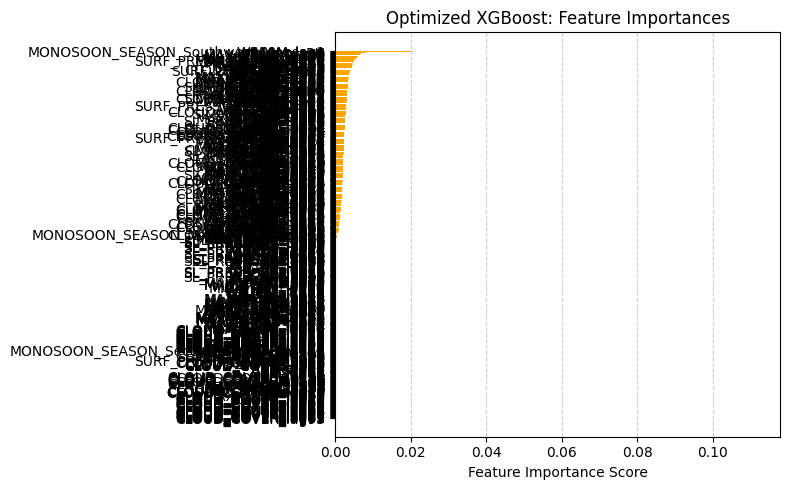

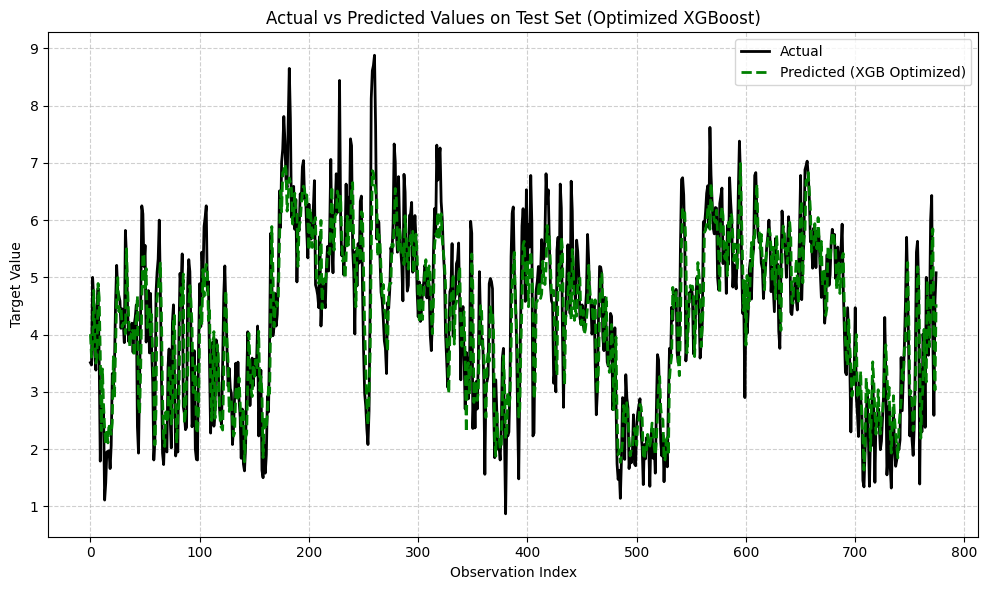

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# Evaluation function
def evaluate_metrics(y_true, y_pred, label=""):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)

    print(f"{label} MSE: {mse:.4f}")
    print(f"{label} RMSE: {rmse:.4f}")
    print(f"{label} MAE: {mae:.4f}")
    print(f"{label} MAPE: {mape:.2f}%")
    print(f"{label} R²: {r2:.4f}")
    return mse, rmse, mae, mape, r2

# Initialize XGBoost with best parameters
best_params = {
    'subsample': 0.8,
    'n_estimators': 200,
    'max_depth': 3,
    'learning_rate': 0.05,
    'gamma': 0,
    'colsample_bytree': 1.0
}
#'subsample': 0.8, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 1.0}
best_xgb = XGBRegressor(
    objective='reg:squarederror',
    random_state=RANDOM_SEED,
    n_jobs=-1,
    early_stopping_rounds=10,
    **best_params
)

# Fit with early stopping evaluation set
best_xgb.fit(
    X_train_sub, y_train,
    eval_set=[(X_test_sub, y_test)],
    verbose=0
)

# Predictions
y_train_pred_xgb_opt = best_xgb.predict(X_train_sub)
y_test_pred_xgb_opt = best_xgb.predict(X_test_sub)

# Evaluation
print("\n--- Optimized XGBoost Evaluation ---")
evaluate_metrics(y_train, y_train_pred_xgb_opt, label="Train (XGB Optimized)")
evaluate_metrics(y_test, y_test_pred_xgb_opt, label="Test (XGB Optimized)")

# Feature Importance
importances_xgb_opt = best_xgb.feature_importances_
importance_df_xgb_opt = pd.DataFrame({
    'Feature': X_train_sub.columns,
    'Importance': importances_xgb_opt
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(8, 5))
plt.barh(importance_df_xgb_opt['Feature'], importance_df_xgb_opt['Importance'], color='orange')
plt.xlabel('Feature Importance Score')
plt.title('Optimized XGBoost: Feature Importances')
plt.gca().invert_yaxis()
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Actual vs Predicted plot
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='black', linewidth=2)
plt.plot(y_test_pred_xgb_opt, label='Predicted (XGB Optimized)', color='green', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Values on Test Set (Optimized XGBoost)')
plt.xlabel('Observation Index')
plt.ylabel('Target Value')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

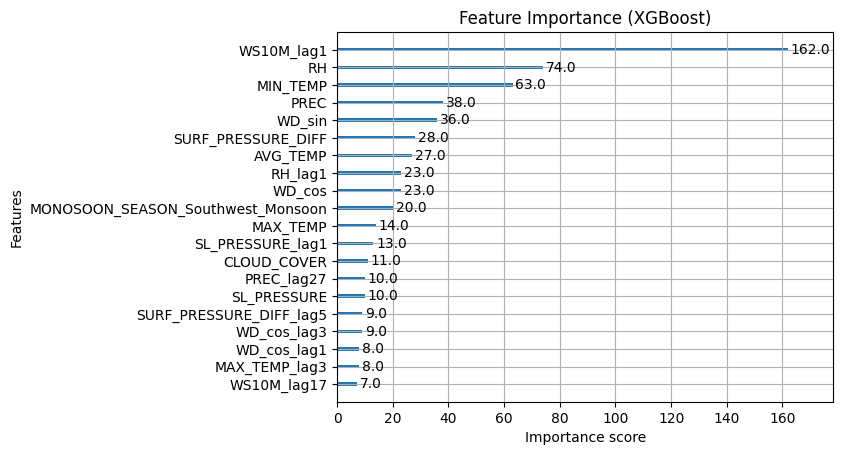


Top 20 Most Important Features:
                               Feature  Importance
316                         WS10M_lag1       162.0
3                                   RH        74.0
2                             MIN_TEMP        63.0
0                                 PREC        38.0
7                               WD_sin        36.0
11                  SURF_PRESSURE_DIFF        28.0
4                             AVG_TEMP        27.0
144                            RH_lag1        23.0
8                               WD_cos        23.0
10   MONOSOON_SEASON_Southwest_Monsoon        20.0
1                             MAX_TEMP        14.0
128                   SL_PRESSURE_lag1        13.0
6                          CLOUD_COVER        11.0
5                          SL_PRESSURE        10.0
123                         PREC_lag27        10.0
315            SURF_PRESSURE_DIFF_lag5         9.0
274                        WD_cos_lag3         9.0
272                        WD_cos_lag1         8.

In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import random


# Feature importance plot
plt.figure(figsize=(12, 8))
xgb.plot_importance(best_xgb, max_num_features=20)  # Show top 20 features
plt.title('Feature Importance (XGBoost)')
plt.show()

# Get feature importance scores and sort them
feature_importance = best_xgb.get_booster().get_score(importance_type='weight')
importance_df = pd.DataFrame({
    'Feature': list(feature_importance.keys()),
    'Importance': list(feature_importance.values())
}).sort_values('Importance', ascending=False)

# Print top features
print("\nTop 20 Most Important Features:")
print(importance_df.head(20))

# Optionally, you can select top N features and retrain the model
# top_features = importance_df.head(30)['Feature'].values
# X_train_reduced = X_train[top_features]
# X_test_reduced = X_test[top_features]

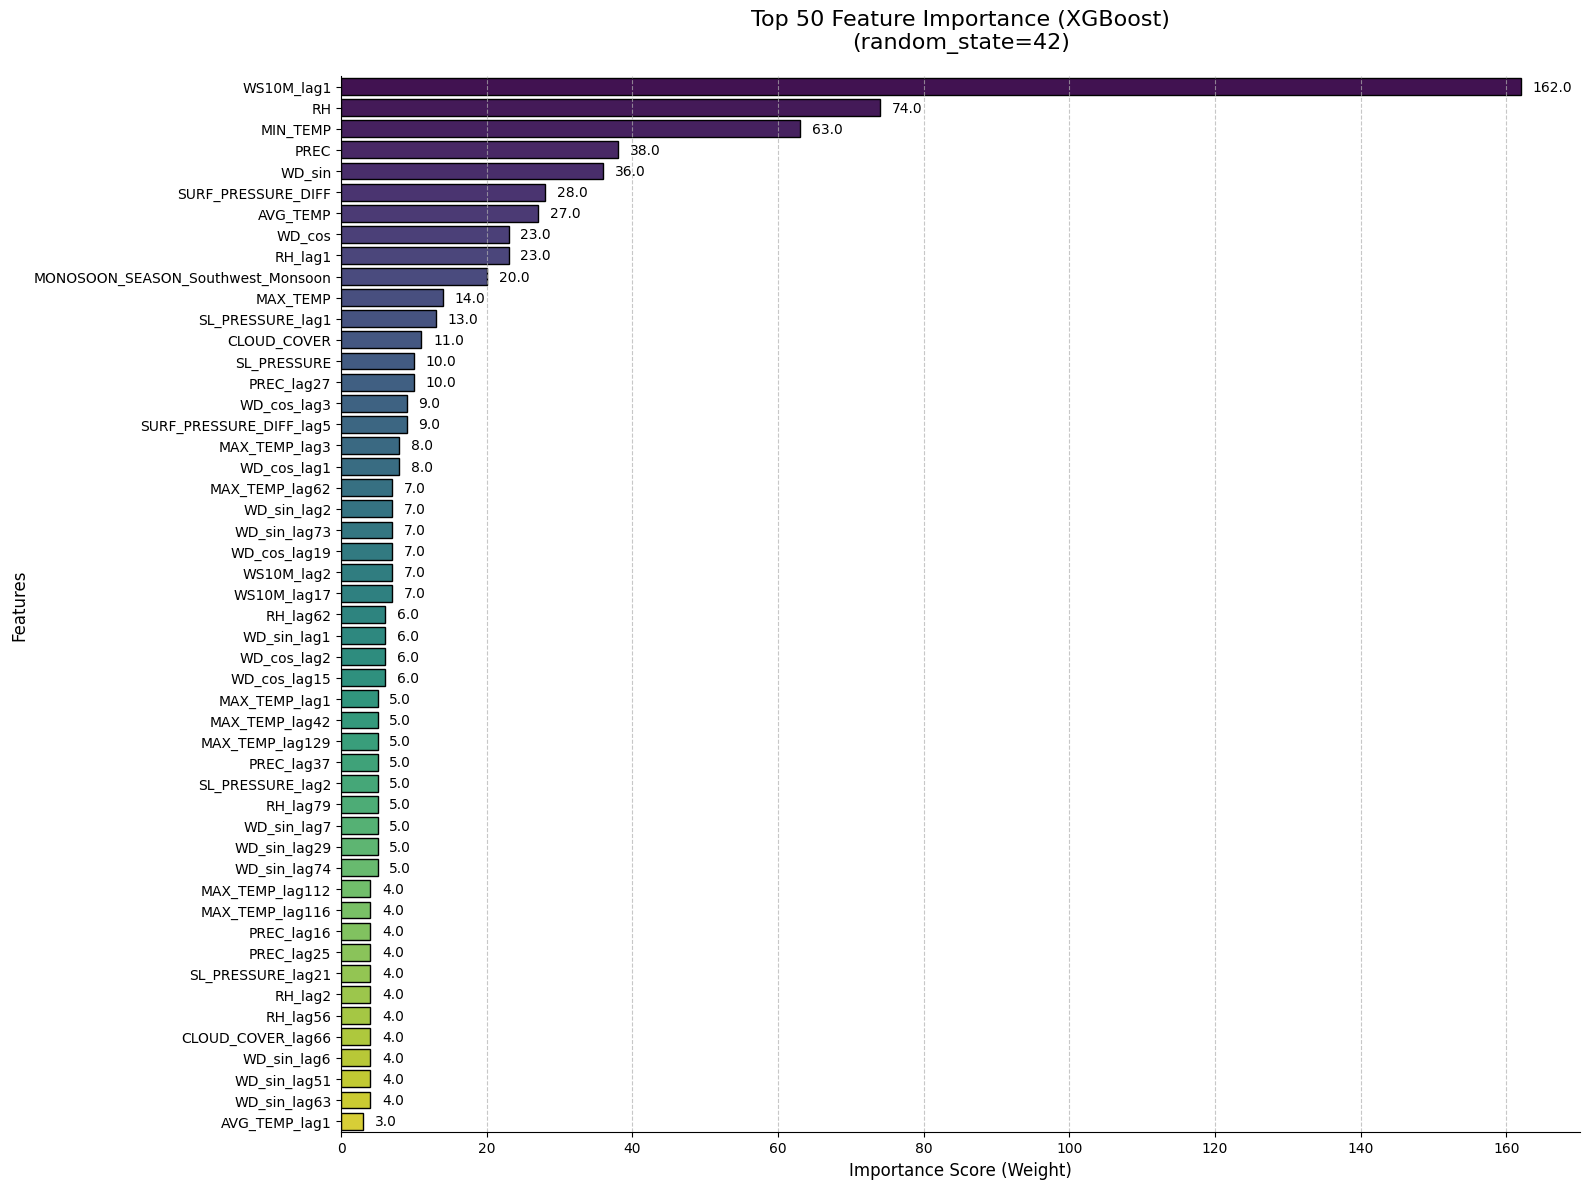

In [ ]:
import numpy as np
import random

# Set random seeds for full reproducibility
random.seed(42)
np.random.seed(42)

# Enhanced Feature Importance Plot (Seaborn) - Descending Order
plt.figure(figsize=(16, 12))

# Get feature importance
importance = best_xgb.get_booster().get_score(importance_type='weight')
importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)[:50]  # Top 50 features

# Create dataframe for plotting (sorted in DESCENDING order)
df_importance = pd.DataFrame(importance, columns=['Feature', 'Importance'])
df_importance = df_importance.sort_values('Importance', ascending=False)

# Create the plot (now in correct order)
ax = sns.barplot(x='Importance',
                 y='Feature',
                 data=df_importance,
                 palette='viridis',
                 edgecolor='black',
                 order=df_importance['Feature'])  # Explicit order control

# Add value labels
for i, (_, row) in enumerate(df_importance.iterrows()):
    ax.text(row['Importance'] + max(df_importance['Importance'])*0.01,
            i,
            f"{row['Importance']:.1f}",
            va='center',
            fontsize=10)

# Customize plot
plt.title('Top 50 Feature Importance (XGBoost)\n(random_state=42)', fontsize=16, pad=20)
plt.xlabel('Importance Score (Weight)', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
sns.despine()
plt.tight_layout()
plt.show()

#Variable Set 1:

#'WS10M_lag1', 'PREC', 'RH', 'MIN_TEMP', 'MAX_TEMP', 'WD_sin', 'SURF_PRESSSURE', 'WD_cos', 'AVG_TEMP'

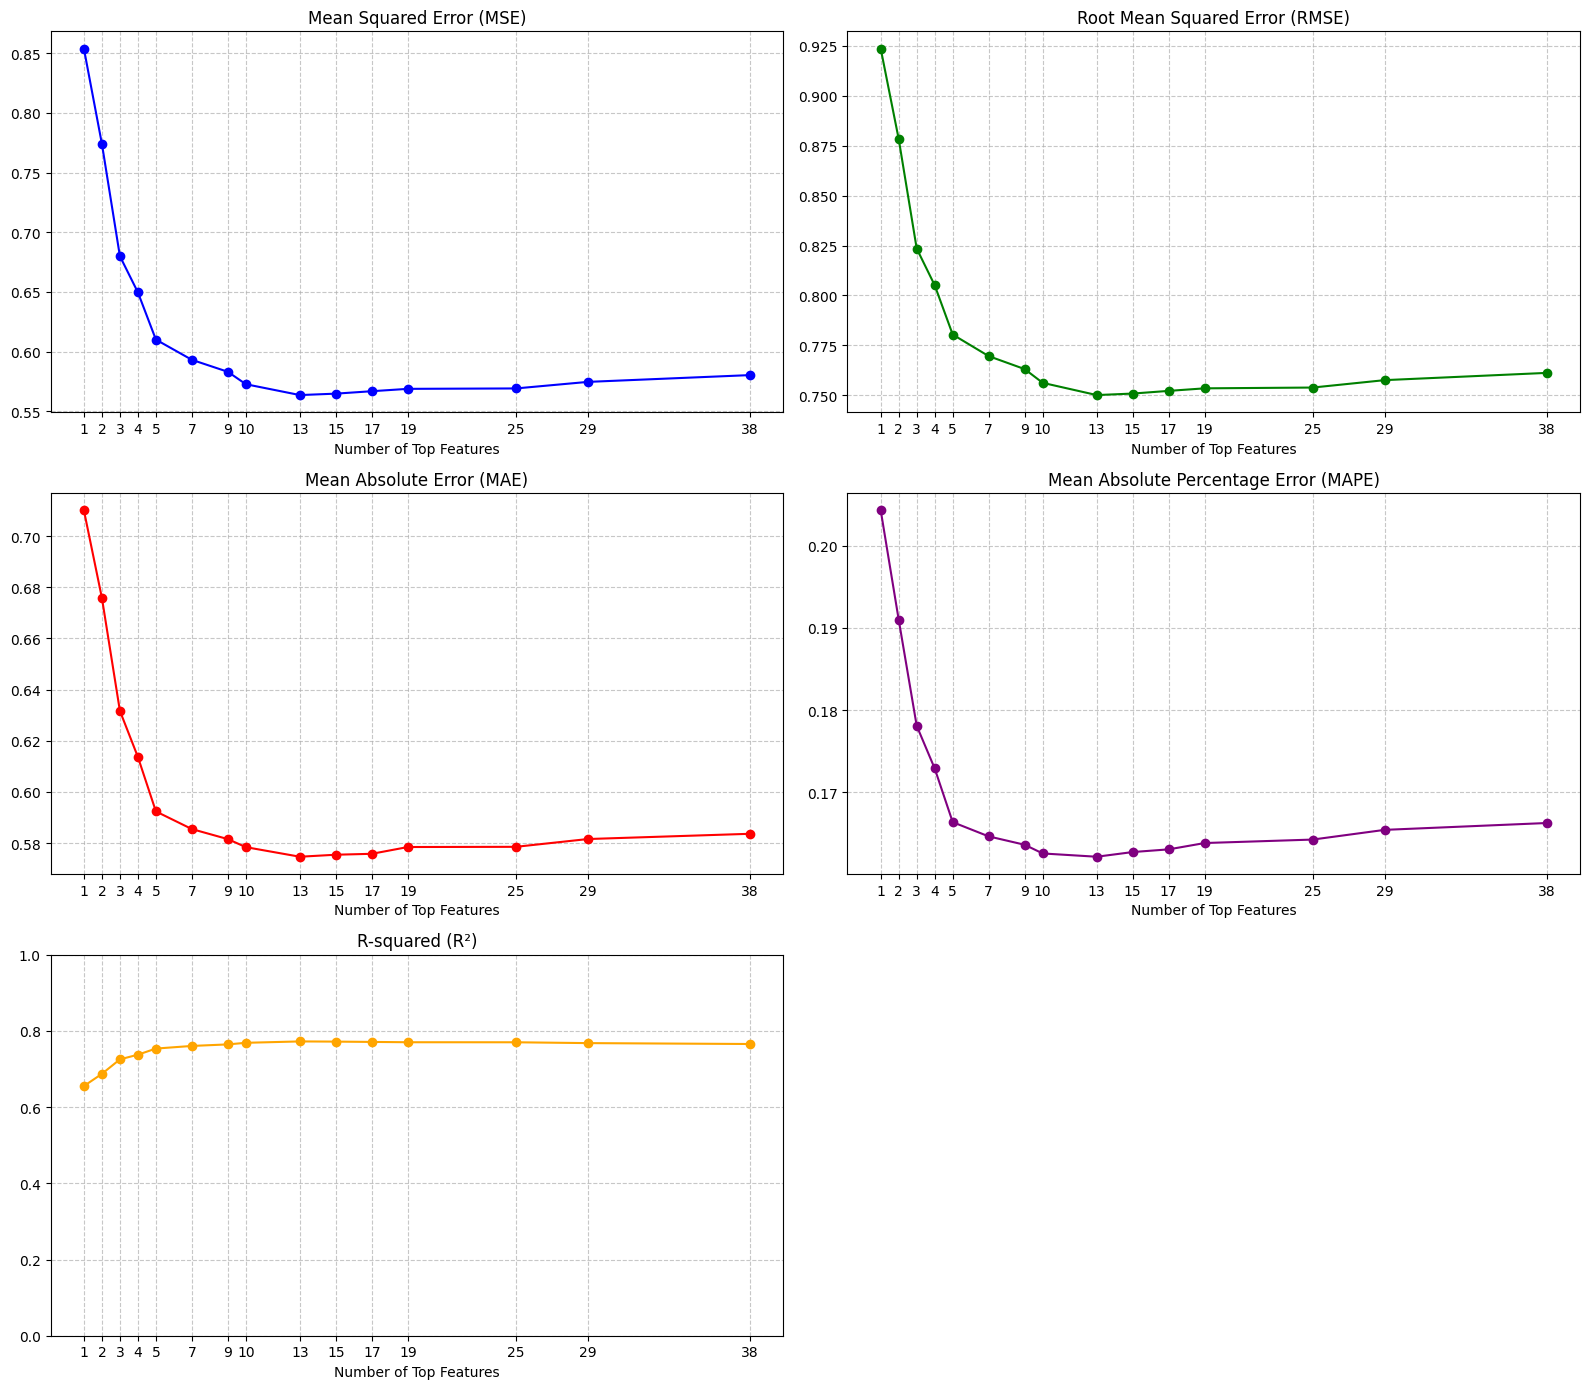

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (mean_absolute_error, mean_squared_error,
                            mean_absolute_percentage_error, r2_score)

# Set random seed for reproducibility
SEED = 42
np.random.seed(SEED)
random.seed(SEED)

# Enhanced function to include R-squared calculation
def cross_validate_model(X, y, selected_features):
    X_selected = X[selected_features]
    model = RandomForestRegressor(random_state=SEED)
    tscv = TimeSeriesSplit(n_splits=5)

    mse_scores, rmse_scores, mae_scores, mape_scores, r2_scores = [], [], [], [], []

    for train_index, test_index in tscv.split(X_selected):
        X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mse_scores.append(mean_squared_error(y_test, y_pred))
        rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
        mae_scores.append(mean_absolute_error(y_test, y_pred))
        mape_scores.append(mean_absolute_percentage_error(y_test, y_pred))
        r2_scores.append(r2_score(y_test, y_pred))

    return (np.mean(mse_scores), np.mean(rmse_scores),
            np.mean(mae_scores), np.mean(mape_scores),
            np.mean(r2_scores))

# Initialize results dictionaries
results_mse, results_rmse, results_mae, results_mape, results_r2 = {}, {}, {}, {}, {}

# Define feature counts to test - now using the full list consistently
top_features_counts = [1,2,3,4,5,7,9,10,13,15,17,19,25,29,38]

# Update the loop to include all metrics
for n in top_features_counts:
    selected_features = df_importance.head(n)['Feature']
    mse, rmse, mae, mape, r2 = cross_validate_model(df.drop(columns=['WS10M']), y, selected_features)

    results_mse[n] = mse
    results_rmse[n] = rmse
    results_mae[n] = mae
    results_mape[n] = mape
    results_r2[n] = r2

# Prepare all values for plotting using the same feature counts
feature_counts = list(results_mse.keys())
mse_values = list(results_mse.values())
rmse_values = list(results_rmse.values())
mae_values = list(results_mae.values())
mape_values = list(results_mape.values())
r2_values = list(results_r2.values())

# Create a 3x2 grid for all metrics
fig, axs = plt.subplots(3, 2, figsize=(16, 14))

# Plot all metrics using the same feature_counts
axs[0, 0].plot(feature_counts, mse_values, marker='o', color='b')
axs[0, 0].set_title('Mean Squared Error (MSE)')
axs[0, 1].plot(feature_counts, rmse_values, marker='o', color='g')
axs[0, 1].set_title('Root Mean Squared Error (RMSE)')
axs[1, 0].plot(feature_counts, mae_values, marker='o', color='r')
axs[1, 0].set_title('Mean Absolute Error (MAE)')
axs[1, 1].plot(feature_counts, mape_values, marker='o', color='purple')
axs[1, 1].set_title('Mean Absolute Percentage Error (MAPE)')

# R-squared plot
axs[2, 0].plot(feature_counts, r2_values, marker='o', color='orange')
axs[2, 0].set_title('R-squared (R²)')
axs[2, 0].set_ylim([0, 1])  # R-squared ranges from 0 to 1

# Hide the empty subplot
axs[2, 1].axis('off')

# Common formatting
for ax in axs.flat:
    if ax.get_visible():  # Only format visible plots
        ax.set_xlabel('Number of Top Features')
        ax.grid(True, linestyle='--', alpha=0.7)
        ax.set_xticks(feature_counts)

plt.tight_layout()
plt.show()

# cross correlatioon top 13

Original training shape: (3099, 682)
Reduced training shape: (3099, 13)

Top 9 Features:
['WS10M_lag1', 'RH', 'MIN_TEMP', 'PREC', 'WD_sin', 'SURF_PRESSURE_DIFF', 'AVG_TEMP', 'WD_cos', 'RH_lag1', 'MONOSOON_SEASON_Southwest_Monsoon', 'MAX_TEMP', 'SL_PRESSURE_lag1', 'CLOUD_COVER']

Test R-squared with top 9 features: 0.7747


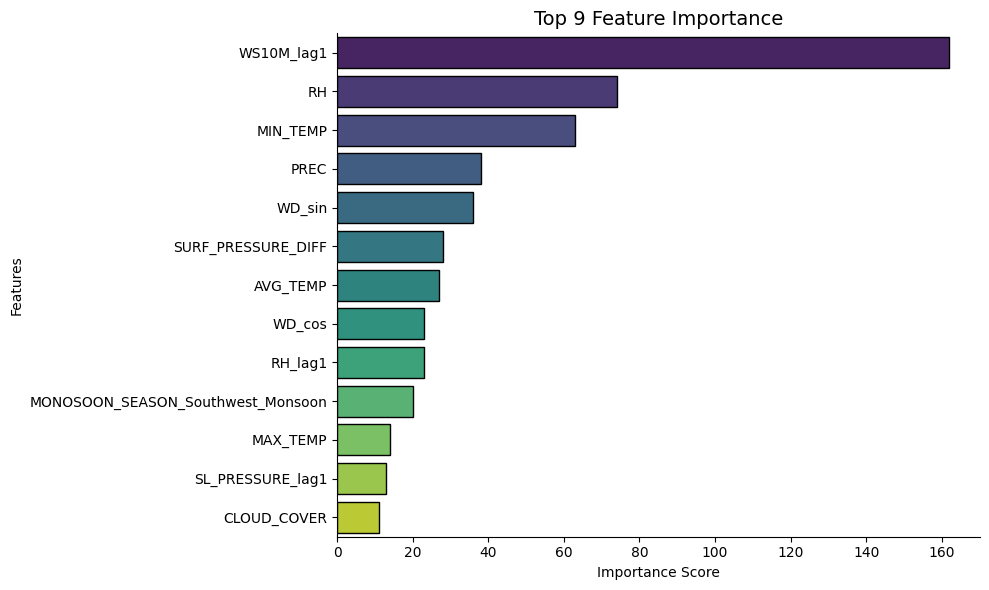


Cross-validated metrics with top 9 features:
R-squared: 0.7723
RMSE: 0.7502
MAE: 0.5746

Evaluation Metrics (Top 9 Features)
+--------------------------------------------------+
|        Metric        |    Train     |     Test     |
+--------------------------------------------------+
| MSE                  |       0.3650 |       0.5484 |
| RMSE                 |       0.6041 |       0.7405 |
| MAE                  |       0.4725 |       0.5665 |
| MAPE                 |      13.1794% |      15.4493% |
| R-squared            |       0.8552 |       0.7747 |
+--------------------------------------------------+

Model Performance Interpretation:
- R-squared: 0.775 (1 is perfect, 0 is baseline)
- RMSE: 0.741 (same units as target variable)
- MAPE: 15.449% (percentage error)


In [ ]:
# Get the top 9 most important features
top_9_features = df_importance.head(13)['Feature'].tolist() #########

# Filter your datasets to only include these top features
X_train_reduced = X_train[top_9_features]
X_test_reduced = X_test[top_9_features]

# Verify the shape
print(f"Original training shape: {X_train.shape}")
print(f"Reduced training shape: {X_train_reduced.shape}")
print("\nTop 9 Features:")
print(top_9_features)

# You can now use these reduced datasets for:
# 1. Model training
best_xgb_reduced = xgb.XGBRegressor(**best_params)
best_xgb_reduced.fit(X_train_reduced, y_train)

# 2. Evaluation
y_test_pred_reduced = best_xgb_reduced.predict(X_test_reduced)
test_r2_reduced = r2_score(y_test, y_test_pred_reduced)
print(f"\nTest R-squared with top 9 features: {test_r2_reduced:.4f}")

# 3. Visualization (feature importance for just these 9 features)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature',
            data=df_importance.head(13),
            palette='viridis',
            edgecolor='black')
plt.title('Top 9 Feature Importance', fontsize=14)
plt.xlabel('Importance Score')
plt.ylabel('Features')
sns.despine()
plt.tight_layout()
plt.show()

# 4. Cross-validation (using your existing function)
mse, rmse, mae, mape, r2 = cross_validate_model(
    pd.concat([X_train, X_test]),  # Combined data
    pd.concat([y_train, y_test]),  # Combined targets
    top_9_features
)
print(f"\nCross-validated metrics with top 9 features:")
print(f"R-squared: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Get predictions using top 9 features
y_train_pred = best_xgb_reduced.predict(X_train_reduced)
y_test_pred = best_xgb_reduced.predict(X_test_reduced)

# Calculate metrics for training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
train_r2 = r2_score(y_train, y_train_pred)

# Calculate metrics for test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
test_r2 = r2_score(y_test, y_test_pred)

# Print metrics in a formatted table
print("\nEvaluation Metrics (Top 9 Features)")
print("+" + "-"*50 + "+")
print("| {:^20} | {:^12} | {:^12} |".format("Metric", "Train", "Test"))
print("+" + "-"*50 + "+")
print("| {:20} | {:12.4f} | {:12.4f} |".format("MSE", train_mse, test_mse))
print("| {:20} | {:12.4f} | {:12.4f} |".format("RMSE", train_rmse, test_rmse))
print("| {:20} | {:12.4f} | {:12.4f} |".format("MAE", train_mae, test_mae))
print("| {:20} | {:12.4f}% | {:12.4f}% |".format("MAPE", train_mape, test_mape))
print("| {:20} | {:12.4f} | {:12.4f} |".format("R-squared", train_r2, test_r2))
print("+" + "-"*50 + "+")

# Additional interpretation
print("\nModel Performance Interpretation:")
print(f"- R-squared: {test_r2:.3f} (1 is perfect, 0 is baseline)")
print(f"- RMSE: {test_rmse:.3f} (same units as target variable)")
print(f"- MAPE: {test_mape:.3f}% (percentage error)")

Original training shape: (3099, 682)
Reduced training shape: (3099, 13)

Top 9 Features:
['WS10M_lag1', 'RH', 'MIN_TEMP', 'PREC', 'WD_sin', 'SURF_PRESSURE_DIFF', 'AVG_TEMP', 'WD_cos', 'RH_lag1', 'MONOSOON_SEASON_Southwest_Monsoon', 'MAX_TEMP', 'SL_PRESSURE_lag1', 'CLOUD_COVER']

Test R-squared with top 9 features: 0.7747


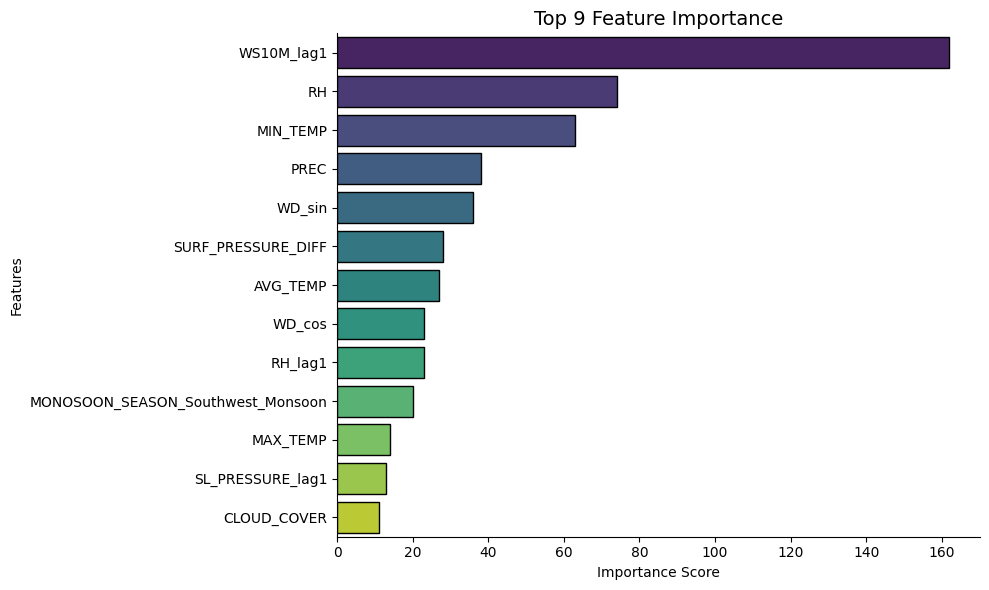


Cross-validated metrics with top 9 features:
R-squared: 0.7723
RMSE: 0.7502
MAE: 0.5746

Evaluation Metrics (Top 9 Features)
+--------------------------------------------------+
|        Metric        |    Train     |     Test     |
+--------------------------------------------------+
| MSE                  |       0.3650 |       0.5484 |
| RMSE                 |       0.6041 |       0.7405 |
| MAE                  |       0.4725 |       0.5665 |
| MAPE                 |      13.1794% |      15.4493% |
| R-squared            |       0.8552 |       0.7747 |
+--------------------------------------------------+

Model Performance Interpretation:
- R-squared: 0.775 (1 is perfect, 0 is baseline)
- RMSE: 0.741 (same units as target variable)
- MAPE: 15.449% (percentage error)


In [ ]:
# Get the top 9 most important features
top_9_features = df_importance.head(13)['Feature'].tolist()  ##############

# Filter your datasets to only include these top features
X_train_reduced = X_train[top_9_features]
X_test_reduced = X_test[top_9_features]

# Verify the shape
print(f"Original training shape: {X_train.shape}")
print(f"Reduced training shape: {X_train_reduced.shape}")
print("\nTop 9 Features:")
print(top_9_features)

# You can now use these reduced datasets for:
# 1. Model training
best_xgb_reduced = xgb.XGBRegressor(**best_params)
best_xgb_reduced.fit(X_train_reduced, y_train)

# 2. Evaluation
y_test_pred_reduced = best_xgb_reduced.predict(X_test_reduced)
test_r2_reduced = r2_score(y_test, y_test_pred_reduced)
print(f"\nTest R-squared with top 9 features: {test_r2_reduced:.4f}")

# 3. Visualization (feature importance for just these 9 features)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature',
            data=df_importance.head(13),
            palette='viridis',
            edgecolor='black')
plt.title('Top 9 Feature Importance', fontsize=14)
plt.xlabel('Importance Score')
plt.ylabel('Features')
sns.despine()
plt.tight_layout()
plt.show()

# 4. Cross-validation (using your existing function)
mse, rmse, mae, mape, r2 = cross_validate_model(
    pd.concat([X_train, X_test]),  # Combined data
    pd.concat([y_train, y_test]),  # Combined targets
    top_9_features
)
print(f"\nCross-validated metrics with top 9 features:")
print(f"R-squared: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Get predictions using top 9 features
y_train_pred = best_xgb_reduced.predict(X_train_reduced)
y_test_pred = best_xgb_reduced.predict(X_test_reduced)

# Calculate metrics for training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
train_r2 = r2_score(y_train, y_train_pred)

# Calculate metrics for test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
test_r2 = r2_score(y_test, y_test_pred)

# Print metrics in a formatted table
print("\nEvaluation Metrics (Top 9 Features)")
print("+" + "-"*50 + "+")
print("| {:^20} | {:^12} | {:^12} |".format("Metric", "Train", "Test"))
print("+" + "-"*50 + "+")
print("| {:20} | {:12.4f} | {:12.4f} |".format("MSE", train_mse, test_mse))
print("| {:20} | {:12.4f} | {:12.4f} |".format("RMSE", train_rmse, test_rmse))
print("| {:20} | {:12.4f} | {:12.4f} |".format("MAE", train_mae, test_mae))
print("| {:20} | {:12.4f}% | {:12.4f}% |".format("MAPE", train_mape, test_mape))
print("| {:20} | {:12.4f} | {:12.4f} |".format("R-squared", train_r2, test_r2))
print("+" + "-"*50 + "+")

# Additional interpretation
print("\nModel Performance Interpretation:")
print(f"- R-squared: {test_r2:.3f} (1 is perfect, 0 is baseline)")
print(f"- RMSE: {test_rmse:.3f} (same units as target variable)")
print(f"- MAPE: {test_mape:.3f}% (percentage error)")

Variable Set 1:

'WS10M_lag1', 'PREC', 'RH', 'MIN_TEMP', 'MAX_TEMP', 'WD_sin', 'SURF_PRESSSURE', 'WD_cos', 'AVG_TEMP'

In [ ]:
# INSTALLING **PACKAGES**


!pip install statsmodels

! pip install optuna

!pip install tabulate

# Standard libraries
import sys  # System-specific parameters and functions
import os   # Miscellaneous operating system interfaces
import warnings  # Warning control
warnings.filterwarnings("ignore")

# Data manipulation
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical operations

# Visualization
import matplotlib.pyplot as plt  # Plotting library
import seaborn as sns  # Statistical data visualization
from matplotlib.colors import ListedColormap  # Colormap utilities

# Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler  # Preprocessing tools
from sklearn import model_selection, metrics, preprocessing  # Model selection, evaluation, and preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV  # Model selection and evaluation
from sklearn.tree import DecisionTreeClassifier  # Decision tree classifier


# Statistical analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor  # Variance inflation factor
from scipy.stats import pointbiserialr, chi2_contingency, spearmanr, entropy  # Statistical functions
from statsmodels.graphics.gofplots import qqplot  # Q-Q plot
from collections import Counter  # Container datatypes

# Tabulate
from tabulate import tabulate  # Pretty-print tabular data

# Set visualization style
#sns.set()  # Set Seaborn default style
#plt.style.use('ggplot')  # Set ggplot style for matplotlib



# LOADING THE DATA SET
#https://drive.google.com/file/d/1Z_KsoIumw-fvivVombIoWuRo0LOe2nCb/view?usp=sharing
#https://drive.google.com/file/d/1aD1PXfwEEZ_F2lQgxuPfj-TVbxQ6NajK/view?usp=sharing
import gdown
import pandas as pd


# Read Xlsx file
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
import pandas as pd
import numpy as np  # Ensure numpy is imported
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Read Xlsx file
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
import pandas as pd
import numpy as np  # Ensure numpy is imported
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


import pandas as pd

# Updated Google Sheets link setup
sheet_id = "1j_Euo80PrGckVDVr2hTG9zZebxJD0TSC"
sheet_name = "Sheet1"  # Update this if the sheet name is different

# Generate the CSV export link
csv_url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

# Read the Google Sheet as CSV
df = pd.read_csv(csv_url)

# Backup original DataFrame
df_backup = df.copy()


# Set Date as the index
df = df.set_index('Date')

# Display the DataFrame (optional in scripts)
df.head()
df_backup=df.copy()



monsoon_cols=['MONOSOON_SEASON_Northeast_Monsoon',
       'MONOSOON_SEASON_Second_Inter_Monsoon',
       'MONOSOON_SEASON_Southwest_Monsoon']
df[monsoon_cols]=df[monsoon_cols].astype(int)
# 1. Make first differences to ensure stationarity
df['SURF_PRESSURE_DIFF'] = df['SURF_PRESSSURE'].diff().dropna()

# 2. Remove the original non-stationary series
df = df.drop(columns=['SURF_PRESSSURE'])


# 4. Final check - drop any NaN values created by differencing
df = df.dropna()
# Define the number of lag terms
num_lags = 1
# Columns to exclude from lagging
exclude_cols = ["YEAR", "MO", "DY"]

# Create lag features for each column except excluded ones
lagged_df = df.copy()
for lag in range(1, num_lags + 1):
    # Only shift columns that aren't in exclude_cols
    cols_to_lag = [col for col in df.columns if col not in exclude_cols]
    lagged_features = df[cols_to_lag].shift(lag).add_suffix(f'_lag{lag}')
    lagged_df = pd.concat([lagged_df, lagged_features], axis=1)

# Drop rows with NaN values (since initial lags will have missing values)
lagged_df = lagged_df.dropna()

# Verify the results
print("Original columns:", df.columns.tolist())
print("\nNew columns with lags:", [col for col in lagged_df.columns if '_lag' in col])
print("\nExcluded columns from lagging:", exclude_cols)


# Display the first few rows
print(lagged_df.head())
lagged_df
df = lagged_df
df

Original columns: ['YEAR', 'MO', 'DY', 'PREC', 'MAX_TEMP', 'MIN_TEMP', 'RH', 'AVG_TEMP', 'SL_PRESSURE', 'CLOUD_COVER', 'WS10M', 'WD_sin', 'WD_cos', 'MONOSOON_SEASON_Northeast_Monsoon', 'MONOSOON_SEASON_Second_Inter_Monsoon', 'MONOSOON_SEASON_Southwest_Monsoon', 'SURF_PRESSURE_DIFF']

New columns with lags: ['PREC_lag1', 'MAX_TEMP_lag1', 'MIN_TEMP_lag1', 'RH_lag1', 'AVG_TEMP_lag1', 'SL_PRESSURE_lag1', 'CLOUD_COVER_lag1', 'WS10M_lag1', 'WD_sin_lag1', 'WD_cos_lag1', 'MONOSOON_SEASON_Northeast_Monsoon_lag1', 'MONOSOON_SEASON_Second_Inter_Monsoon_lag1', 'MONOSOON_SEASON_Southwest_Monsoon_lag1', 'SURF_PRESSURE_DIFF_lag1']

Excluded columns from lagging: ['YEAR', 'MO', 'DY']
                     YEAR  MO  DY   PREC  MAX_TEMP  MIN_TEMP     RH  AVG_TEMP  \
Date                                                                            
2013-01-03 00:00:00  2013   1   3  13.42     28.38     23.42  86.26      26.4   
2013-01-04 00:00:00  2013   1   4   8.79     27.58     22.93  86.31      25.1   

,YEAR,MO,DY,PREC,MAX_TEMP,MIN_TEMP,RH,AVG_TEMP,SL_PRESSURE,CLOUD_COVER,...,AVG_TEMP_lag1,SL_PRESSURE_lag1,CLOUD_COVER_lag1,WS10M_lag1,WD_sin_lag1,WD_cos_lag1,MONOSOON_SEASON_Northeast_Monsoon_lag1,MONOSOON_SEASON_Second_Inter_Monsoon_lag1,MONOSOON_SEASON_Southwest_Monsoon_lag1,SURF_PRESSURE_DIFF_lag1
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-03 00:00:00,2013,1,3,13.42,28.38,23.42,86.26,26.4,1011.0,8.0,...,27.6,1010.4,5.0,4.25,0.500000,0.866025,1.0,0.0,0.0,0.08
2013-01-04 00:00:00,2013,1,4,8.79,27.58,22.93,86.31,25.1,1010.1,8.0,...,26.4,1011.0,8.0,4.75,0.439939,0.898028,1.0,0.0,0.0,0.03
2013-01-05 00:00:00,2013,1,5,2.60,26.16,22.17,86.88,26.9,1007.5,8.0,...,25.1,1010.1,8.0,5.74,0.424199,0.905569,1.0,0.0,0.0,-0.03
2013-01-06 00:00:00,2013,1,6,1.65,27.75,23.47,88.09,27.3,1008.2,7.0,...,26.9,1007.5,8.0,5.79,0.563526,0.826098,1.0,0.0,0.0,-0.15
2013-01-07 00:00:00,2013,1,7,27.41,26.70,24.04,93.04,25.9,1009.2,8.0,...,27.3,1008.2,7.0,4.52,0.460200,0.887815,1.0,0.0,0.0,-0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27 00:00:00,2023,12,27,9.45,30.35,24.40,88.57,29.5,1011.0,5.0,...,28.9,1011.6,4.0,6.01,0.483282,0.875465,1.0,0.0,0.0,-0.03
2023-12-28 00:00:00,2023,12,28,13.93,29.37,25.51,90.59,28.5,1010.9,7.0,...,29.5,1011.0,5.0,6.43,0.381070,0.924546,1.0,0.0,0.0,-0.09
2023-12-29 00:00:00,2023,12,29,9.80,29.30,25.03,89.03,28.2,1011.4,7.0,...,28.5,1010.9,7.0,3.93,0.634731,0.772734,1.0,0.0,0.0,-0.08


In [ ]:
2# Get top 15 important features (excluding temporal columns)
top_15_features = df_importance.head(13)['Feature'].tolist()

# Add temporal columns to keep (note: no spaces in column names!)
selected_features = top_15_features + ["YEAR", "MO", "DY","WS10M"]

# Select these columns from your DataFrame
filtered_df = df[selected_features].copy()


In [ ]:
# Save to CSV
filtered_df.to_csv('ImportantFeaturelagcrosscorrelated.csv', index=False)

print(f"DataFrame saved as 'ImportantFeaturelag cross correlated.csv' with {len(filtered_df.columns)} columns")

DataFrame saved as 'ImportantFeaturelag cross correlated.csv' with 17 columns


In [ ]:
filtered_df

,WS10M_lag1,RH,MIN_TEMP,PREC,WD_sin,SURF_PRESSURE_DIFF,AVG_TEMP,WD_cos,RH_lag1,MONOSOON_SEASON_Southwest_Monsoon,MAX_TEMP,SL_PRESSURE_lag1,CLOUD_COVER,YEAR,MO,DY,WS10M
Date,,,,,,,,,,,,,,,,,
2013-01-03 00:00:00,4.25,86.26,23.42,13.42,0.439939,0.03,26.4,0.898028,86.19,0,28.38,1010.4,8.0,2013,1,3,4.75
2013-01-04 00:00:00,4.75,86.31,22.93,8.79,0.424199,-0.03,25.1,0.905569,86.26,0,27.58,1011.0,8.0,2013,1,4,5.74
2013-01-05 00:00:00,5.74,86.88,22.17,2.60,0.563526,-0.15,26.9,0.826098,86.31,0,26.16,1010.1,8.0,2013,1,5,5.79
2013-01-06 00:00:00,5.79,88.09,23.47,1.65,0.460200,-0.03,27.3,0.887815,86.88,0,27.75,1007.5,7.0,2013,1,6,4.52
2013-01-07 00:00:00,4.52,93.04,24.04,27.41,0.368125,-0.01,25.9,0.929776,88.09,0,26.70,1008.2,8.0,2013,1,7,4.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27 00:00:00,6.01,88.57,24.40,9.45,0.381070,-0.09,29.5,0.924546,86.27,0,30.35,1011.6,5.0,2023,12,27,6.43
2023-12-28 00:00:00,6.43,90.59,25.51,13.93,0.634731,-0.08,28.5,0.772734,88.57,0,29.37,1011.0,7.0,2023,12,28,3.93
2023-12-29 00:00:00,3.93,89.03,25.03,9.80,0.689620,0.11,28.2,0.724172,90.59,0,29.30,1010.9,7.0,2023,12,29,2.59
